In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14,8 
RANDOM_SEED = 42
LABELS = ['Normal','Fraud']

In [18]:
dataset = pd.read_csv('data/creditcard.csv')

In [19]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [21]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [22]:
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


## Exploratory Data Analysis

([<matplotlib.axis.XTick at 0x2960a8662c8>,
 <a list of 2 Text xticklabel objects>)

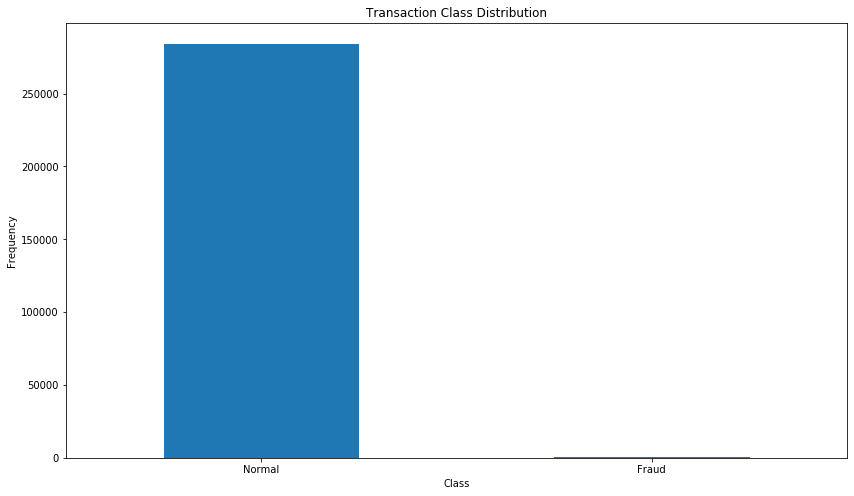

In [23]:
count_class = pd.value_counts(dataset['Class'],sort = True)
count_class.plot(kind = 'bar', rot = 0)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Transaction Class Distribution')
plt.xticks(range(2), LABELS)

In [24]:
(dataset['Class'] == 0).value_counts()

True     284315
False       492
Name: Class, dtype: int64

In [25]:
normal = dataset[dataset['Class'] == 0]
fraud = dataset[dataset['Class'] == 1]
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


### Technique 1

In [10]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [13]:
smk = SMOTETomek()
X_res, Y_res = smk.fit_sample(X,Y)

In [14]:
print(X_res.shape,Y_res.shape)

(567572, 30) (567572,)


In [15]:
from collections import Counter
print(Counter(Y),Counter(Y_res))

Counter({0: 284315, 1: 492}) Counter({0: 283786, 1: 283786})


### Technique 2

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [28]:
os = RandomOverSampler()

In [30]:
X_train_res, Y_train_res = os.fit_sample(X, Y)

In [31]:
print(Counter(Y),Counter(Y_train_res))

Counter({0: 284315, 1: 492}) Counter({0: 284315, 1: 284315})
